<a href="https://colab.research.google.com/github/myliujiaheng/hello-world/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
data = pd.read_csv('winequality-red.csv')
data.describe()
data.isnull().sum()
data.head()
data.columns=['f_acid', 'v_acid', 'c_acid', 'res_sugar', 'cl', 'f_sd', 't_sd', 'dens', 'pH', 'sul', 'alc', 'quality']
data.head()

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
for i in range(0,12):
  sns.boxplot(data.iloc[:,i])
  plt.xlabel(data.columns[i])
  plt.show()

In [91]:
#select = data['quality'] <= 5
select1 = data['quality'] <= 4
select2 = data['quality'] >= 7

data['review'] = 'normal'
data.loc[select1,'review'] = 'bad'
data.loc[select2,'review'] = 'good'

#data['review2'] = 'good'
#data.loc[select, 'review2'] = 'bad'

data.head(10)

,f_acid,v_acid,c_acid,res_sugar,cl,f_sd,t_sd,dens,pH,sul,alc,quality,review
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,normal
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,normal
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,normal
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,normal
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,normal
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,normal
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,normal
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,normal


In [0]:
sns.pairplot(data, vars=data.columns[0:3], hue='review2');

In [0]:
sns.pairplot(data, vars=['f_sd','t_sd','sul'], hue='review2');

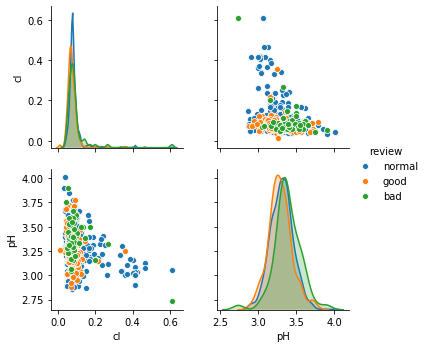

In [88]:
sns.pairplot(data, vars=['cl','pH'], hue='review');

In [0]:
sns.pairplot(data, vars=['sul','cl','v_acid','pH', 'alc'], hue='review2');

In [0]:
sns.pairplot(data, vars=['sul','res_sugar','v_acid', 'alc'], hue='review');

In [0]:
for i in range(0,12):
  sns.boxplot('quality', data.columns[i], data = data)
  plt.show()

In [0]:
from sklearn.model_selection import cross_val_score
import numpy as np

def rmsef(model, train, lable):
    rmse= np.sqrt(-cross_val_score(model, train, lable, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [0]:
### SVM, SVM with PCA, SVM with sk feature selection
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
y = data.review
X = data.drop(['quality', 'review'], axis=1)

train_X, val_X, train_y, val_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)

In [28]:
## naive SVM
svm = SVC(kernel='rbf') 
svm.fit(train_X, train_y) 
y_svm = svm.predict(train_X)

svm_acc = accuracy_score(train_y, y_svm)
print(svm_acc)

0.8811571540265832


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
## SVM with PCA
# optimize n_components
n_range = range(1,12)
n_scores = []
n_rmse = []

for n in n_range:
    pca=PCA(n_components=n) 
    X_pca = pca.fit_transform(X)
    svm_temp = SVC(kernel='rbf')
    scores = cross_validate(svm_temp, X_pca, y, cv=5, scoring='accuracy')
    n_scores.append(scores['test_score'].mean())
    

plt.plot(n_range, n_scores)
plt.xlabel('# of components')
plt.ylabel('Cross-Validated Accuracy')

plt.show()


In [34]:
# n=8
pca=PCA(n_components=8)
X_pca = pca.fit_transform(X)
svm_pca = SVC(kernel='rbf')
train_X_pca, val_X_pca, train_y_pca, val_y_pca = train_test_split(X_pca, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)

svm_pca.fit(train_X_pca, train_y_pca) 
y_svm_pca = svm_pca.predict(train_X_pca)

svm_pca_acc = accuracy_score(train_y_pca, y_svm_pca)
print(svm_pca_acc)

0.8897576231430805


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
## forestclf selection
forestclf_select = RandomForestClassifier(random_state=100)
forestclf_select.fit(train_X, train_y)
model = SelectFromModel(forestclf_select, prefit=True, max_features=11) 
feature_idx = model.get_support()
feature_names = X.columns[feature_idx]
X_fcs = pd.DataFrame(model.transform(X), columns= feature_names)

train_X_fcs, val_X_fcs, train_y_fcs, val_y_fcs = train_test_split(X_fcs, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)

X_fcs.head()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,v_acid,sul,alc
0,0.70,0.56,9.4
1,0.88,0.68,9.8
2,0.76,0.65,9.8
3,0.28,0.58,9.8
4,0.70,0.56,9.4


In [39]:
## SVM with sk feature selection 
svm_fcs = SVC(kernel='rbf')
svm_fcs.fit(train_X_fcs, train_y_fcs)
y_svm_fcs = svm_fcs.predict(train_X_fcs)

svm_fcs_acc = accuracy_score(train_y_fcs, y_svm_fcs)
print(svm_fcs_acc)

0.838154808444097


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [30]:
### forest, forest with pca, forest with feature selection
## naive forest
from sklearn.ensemble import RandomForestClassifier

forestclf = RandomForestClassifier(random_state=100)
forestclf.fit(train_X, train_y) 
y_forestclf = forestclf.predict(train_X)

forestclf_acc = accuracy_score(train_y, y_forestclf)
print(forestclf_acc)

0.9906176700547302


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
## forest with PCA
# optimize n_components
n_range = range(1,12)
n_scores = []

for n in n_range:
    pca=PCA(n_components=n) 
    X_pca = pca.fit_transform(X)
    forest_temp = RandomForestClassifier(random_state=100)
    scores = cross_validate(forest_temp, X_pca, y, cv=5, scoring='accuracy')
    n_scores.append(scores['test_score'].mean())

plt.plot(n_range, n_scores)
plt.xlabel('# of components')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [36]:
# n=10
pca=PCA(n_components=10)
X_pca = pca.fit_transform(X)
forestclf_pca = RandomForestClassifier(random_state=100)
train_X_pca, val_X_pca, train_y_pca, val_y_pca = train_test_split(X_pca, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)

forestclf_pca.fit(train_X_pca, train_y_pca) 
y_forestclf_pca = forestclf_pca.predict(train_X_pca)

forestclf_pca_acc = accuracy_score(train_y_pca, y_forestclf_pca)
print(forestclf_pca_acc)

0.9906176700547302


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
## forestclf with feature selection 
forestclf_fcs = RandomForestClassifier(random_state=100)
forestclf_fcs.fit(train_X_fcs, train_y_fcs)
y_forestclf_fcs = forestclf_fcs.predict(train_X_fcs)

forestclf_fcs_acc = accuracy_score(train_y_fcs, y_forestclf_fcs)
print(forestclf_fcs_acc)

0.9898358092259578


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
### naive regression, lasso regression, forest regression, naive regression with sk.select, naive regression with pca
from sklearn.metrics import mean_squared_log_error

yreg = data.quality
train_X, val_X, train_y, val_y = train_test_split(X, yreg, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)


In [0]:
## naive regresion 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(train_X, train_y)
y_lm = (lm.predict(train_X)).round()

lm_mse = mean_squared_log_error(train_y, y_lm)
print(lm_mse)

pd.DataFrame( list(zip(X.columns, lm.coef_)),
            columns=['features', 'estimatedCoeffs'])

In [53]:
## forest regression
from sklearn.ensemble import RandomForestRegressor
forestreg = RandomForestRegressor(random_state=100)
forestreg.fit(train_X, train_y)
y_forestreg = (forestreg.predict(train_X)).round()

forestreg_mse = mean_squared_log_error(train_y, y_forestreg)
print(forestreg_mse)

0.0015595538544017986


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
## forestreg selection
forestreg_select = RandomForestRegressor(random_state=100)
forestreg_select.fit(train_X, train_y)
model = SelectFromModel(forestreg_select, prefit=True, max_features=11) 
feature_idx = model.get_support()
feature_names = X.columns[feature_idx]
X_frs = pd.DataFrame(model.transform(X), columns= feature_names)

train_X_frs, val_X_frs, train_y_frs, val_y_frs = train_test_split(X_frs, yreg, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)

X_frs

In [67]:
## naive regresion with forestreg selection
lm_frs = LinearRegression()
lm_frs.fit( train_X_frs, train_y_frs )
y_lm_frs = (lm_frs.predict(train_X_frs)).round()

lm_frs_mse = mean_squared_log_error(train_y_frs, y_lm_frs)
print(lm_frs_mse)

0.012047119301358518


In [0]:
## naive regression with pca
# optimize n_components
n_range = range(1,12)
n_scores = []

for n in n_range:
    pca=PCA(n_components=n) 
    X_pca = pca.fit_transform(X)
    lm_temp = LinearRegression()
    scores = cross_validate(lm_temp, X_pca, yreg, cv=5, scoring='neg_mean_squared_error')
    n_scores.append(scores['test_score'].mean())

plt.plot(n_range, n_scores)
plt.xlabel('# of components')
plt.ylabel('Cross-Validated neg_mse')
plt.show()

In [58]:
# n=10
pca=PCA(n_components=10)
X_pca = pca.fit_transform(X)
train_X_pca, val_X_pca, train_y_pca, val_y_pca = train_test_split(X_pca, yreg, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)

lm_pca = LinearRegression()
lm_pca.fit( train_X_pca, train_y_pca )
y_lm_pca = (lm_pca.predict(train_X_pca)).round()

lm_pca_mse = mean_squared_log_error(train_y_pca, y_lm_pca)
print(lm_pca_mse)

0.011647456924306843


In [0]:
## lasso
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5, random_state=100)
lasso.fit(X, yreg)
y_lasso = (lasso.predict(train_X)).round()

lasso_mse = mean_squared_log_error(train_y_pca, y_lasso)
print(lasso_mse)

pd.DataFrame( list(zip(X.columns, lasso.coef_)),
            columns=['features', 'estimatedCoeffs'])

In [0]:
### extra experiments
y = data.review
X1 = data.loc[:,['pH', 'cl']]

train_X1, val_X1, train_y1, val_y1 = train_test_split(X1, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)

X2 = data.drop(['quality', 'review', 'pH', 'cl'], axis=1)

train_X2, val_X2, train_y2, val_y2 = train_test_split(X2, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)

In [0]:
svm1 = SVC(kernel= 'rbf')
svm2 = SVC(kernel= 'rbf')

svm1.fit(train_X1, train_y1)
svm2.fit(train_X2, train_y2)

y1 = svm1.predict(val_X1)
y2 = svm2.predict(val_X2)

acc1 = accuracy_score(val_y1, y1)
acc2 = accuracy_score(val_y2, y2)
print([acc1,acc2])



In [0]:
### improve regression by using LGBM
import lightgbm as lgb

gbm = lgb.LGBMRegressor(objective='regression',num_leaves=31,learning_rate=0.05, n_estimators=50)
gbm.fit(train_X, train_y,eval_set=[(train_X, train_y)],eval_metric='l1',early_stopping_rounds=5)
y_gbm = gbm.predict(train_X, num_iteration=gbm.best_iteration_)

gbm_mse = mean_squared_log_error(train_y, y_gbm)
print(gbm_mse)